In [29]:
import os
import sys
import warnings
from tqdm import tqdm

import numpy as np
from skimage.io import imread, imshow, imsave

In [37]:
# Initialization

PATH = 'F:\\MA\\data\\NIH\\20180831_173535_216\\train\\out\\'
dirName = PATH + 'out-cell\\'

warnings.filterwarnings('ignore', category=UserWarning, module='skimage')

# Create target Directory if don't exist
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ")
else:    
    print("Directory " , dirName ,  " already exists")

    
IMG_ID = next(os.walk(PATH))[2]
IMG_WIDTH = 512
IMG_HEIGHT = 512

Directory  F:\MA\data\NIH\20180831_173535_216\train\out\out-cell\  already exists


In [38]:
def label_to_mask(label):
    mask = np.empty([label.shape[0], label.shape[1]])
    
    for x in range(label.shape[0]):
        for y in range(label.shape[1]):
            for c in range(label.shape[2]):
                if label[x,y,c] == 128:
                    mask[x,y] = c+1
                    
    return mask

In [39]:
MASK = np.zeros((len(IMG_ID), IMG_WIDTH, IMG_HEIGHT), dtype=np.uint8)

# Transfer images
print('Transferring images ... ')
sys.stdout.flush()

for n, id_ in tqdm(enumerate(IMG_ID), total=len(IMG_ID)):
    
    label = imread(PATH + id_)
    MASK[n] = label_to_mask(label)    
    imsave(dirName + IMG_ID[n], MASK[n])
    
print('Done!')

Transferring images ... 


100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:54<00:00,  1.97s/it]


Done!


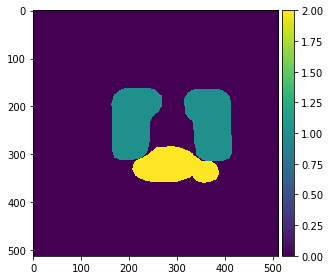

In [41]:
# Sanity test
imshow(MASK[5])